In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
from scipy.optimize import curve_fit

In [66]:
# Load the clean 2005 data CSV file into a Pandas DataFrame
clean_2005_DD_df = pd.read_csv("cleaned_data_csv_files/clean_output_2005_DD_df.csv", low_memory=False)

# Display sample data
clean_2005_DD_df.head()

,Death in United States 2005,detail_age,detail_age_type_text,sex_text,race_text,marital_status_text,day_of_week_of_death_text,month_of_death_text,place_of_death_and_decedents_status_text,manner_of_death_text,358_cause_recode_text,130_infant_cause_recode_text
0,0,45,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,Malignant melanoma of skin (C43),NaN
1,1,61,Years,Male,White,Divorced,Saturday,January,"Hospital, clinic or Medical Center",Natural,Emphysema (J43),NaN
2,2,79,Years,Female,White,Divorced,Sunday,January,Nursing home/long term care,Natural,Other cerebrovascular diseases and their seque...,NaN
3,3,50,Years,Male,White,"Never married, single",Wednesday,January,"Hospital, clinic or Medical Center",Natural,Diabetes mellitus (E10-E14),NaN
4,4,68,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,"Of trachea, bronchus and lung (C33-C34)",NaN


In [67]:
#Reset index to use patient data ID numbers from original CSV, not arbitrary index assignments
clean_2005_DD_df = clean_2005_DD_df.drop(columns=["Death in United States 2005"])
clean_2005_DD_df

,detail_age,detail_age_type_text,sex_text,race_text,marital_status_text,day_of_week_of_death_text,month_of_death_text,place_of_death_and_decedents_status_text,manner_of_death_text,358_cause_recode_text,130_infant_cause_recode_text
0,45,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,Malignant melanoma of skin (C43),NaN
1,61,Years,Male,White,Divorced,Saturday,January,"Hospital, clinic or Medical Center",Natural,Emphysema (J43),NaN
2,79,Years,Female,White,Divorced,Sunday,January,Nursing home/long term care,Natural,Other cerebrovascular diseases and their seque...,NaN
3,50,Years,Male,White,"Never married, single",Wednesday,January,"Hospital, clinic or Medical Center",Natural,Diabetes mellitus (E10-E14),NaN
4,68,Years,Female,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,"Of trachea, bronchus and lung (C33-C34)",NaN
...,...,...,...,...,...,...,...,...,...,...,...
1719610,47,Years,Male,White,Marital Status unknown,Saturday,December,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719611,78,Years,Female,White,"Never married, single",Monday,September,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719612,32,Years,Female,White,Marital Status unknown,Tuesday,December,Decedent’s home,Natural,Diabetes mellitus (E10-E14),NaN
1719613,70,Years,Male,Black,Marital Status unknown,Sunday,December,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN


In [68]:
#Create a new dataframe that only includes the data for individuals with a cause of death related to heart disease
selected_entries = ["All other forms of chronic ischemic heart disease (I20,I25.1-I25.9)",
                    "Acute myocardial infarction (I21-I22)",
                    "Atherosclerotic cardiovascular disease, so described (I25.0)",
                    "Congestive heart failure (I50.0)"]

heart_disease_df = clean_2005_DD_df[clean_2005_DD_df['358_cause_recode_text'].isin(selected_entries)]
heart_disease_df

,detail_age,detail_age_type_text,sex_text,race_text,marital_status_text,day_of_week_of_death_text,month_of_death_text,place_of_death_and_decedents_status_text,manner_of_death_text,358_cause_recode_text,130_infant_cause_recode_text
18,64,Years,Male,White,Divorced,Sunday,January,Other,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
58,63,Years,Male,White,Widowed,Friday,January,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
59,68,Years,Male,American Indian (includes Aleuts and Eskimos),"Never married, single",Saturday,January,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
65,81,Years,Female,White,Widowed,Saturday,January,Other,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
76,75,Years,Male,White,Married,Monday,January,"Hospital, clinic or Medical Center",Natural,All other forms of chronic ischemic heart dise...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1719608,65,Years,Female,Black,Marital Status unknown,Monday,December,"Hospital, Clinic or Medical Center",Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719610,47,Years,Male,White,Marital Status unknown,Saturday,December,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719611,78,Years,Female,White,"Never married, single",Monday,September,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN
1719613,70,Years,Male,Black,Marital Status unknown,Sunday,December,Decedent’s home,Natural,"Atherosclerotic cardiovascular disease, so des...",NaN


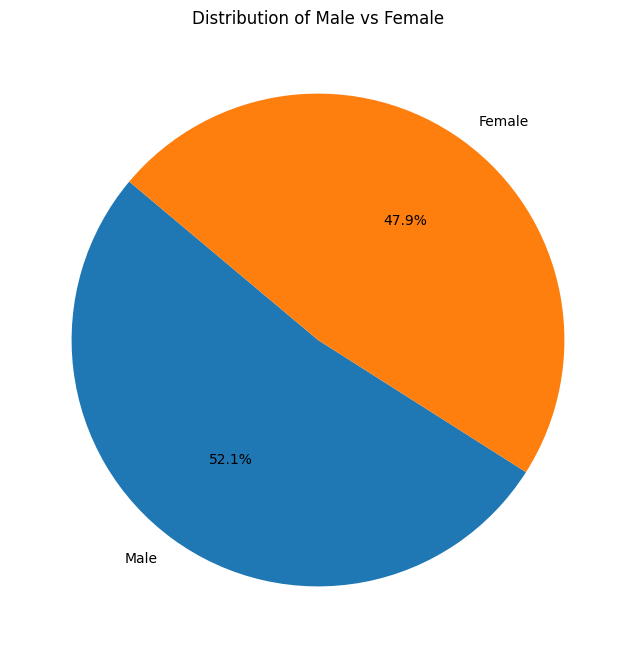

In [69]:
#Create a pie chart showing the percentage of male vs female patients whose cauase of death was heart disease

# Calculate the count of male and female
gender_counts = heart_disease_df['sex_text'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Male vs Female')
plt.show()

In [70]:
#Determine if the difference between males and females is statistically significant
#use t-test

In [71]:
#Use this cell to describe findings

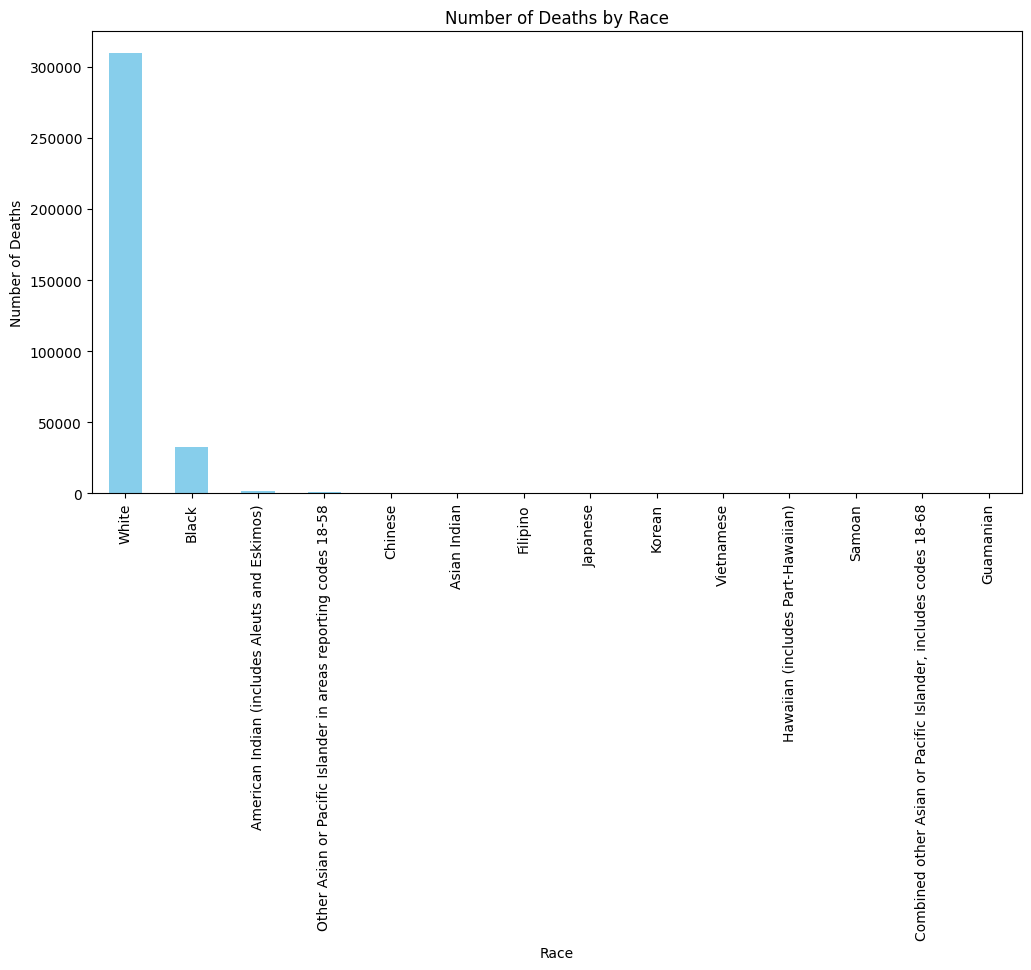

In [72]:
# Create a histogram of deaths due to heart disease by race

plt.figure(figsize=(12, 6))
heart_disease_df['race_text'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Deaths by Race')
plt.xlabel('Race')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.show()

In [73]:
#Determine if the difference between males and females is statistically significant
#use ANOVA test

In [74]:
#Use this cell to describe findings

C:\Users\STEFF\AppData\Local\Temp\ipykernel_61364\2671947066.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_group'] = pd.cut(filtered_df['detail_age'], bins=age_bins, labels=age_bins[:-1])
C:\Users\STEFF\AppData\Local\Temp\ipykernel_61364\2671947066.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = filtered_df.groupby('age_group').size()


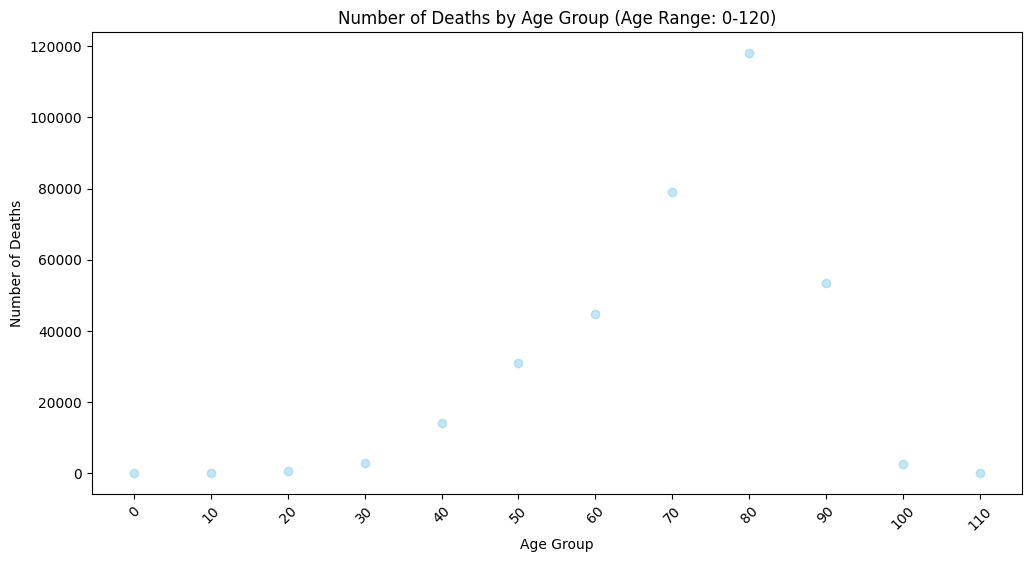

In [75]:
# Create a scatter plot of deaths by age

# Filter out entries with age greater than 120 (Age Unknown populates as a number in the thousands)
filtered_df = heart_disease_df[heart_disease_df['detail_age'] <= 120]

# Define age groups for aggregation
# Create age bins of width 10
age_bins = np.arange(0, 121, 10)  

# Create a new column 'age_group' based on the age bins
filtered_df['age_group'] = pd.cut(filtered_df['detail_age'], bins=age_bins, labels=age_bins[:-1])

# Group by age group and count the number of deaths in each group
age_group_counts = filtered_df.groupby('age_group').size()

# Convert age_group_counts index to numeric
age_group_counts.index = pd.to_numeric(age_group_counts.index)

# Create a scatter plot of deaths by age group
plt.figure(figsize=(12, 6))
plt.scatter(age_group_counts.index, age_group_counts, color='skyblue', alpha=0.5)
plt.title('Number of Deaths by Age Group (Age Range: 0-120)')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(age_group_counts.index, rotation=45)
plt.show()

R-squared value: 0.14967268159330932


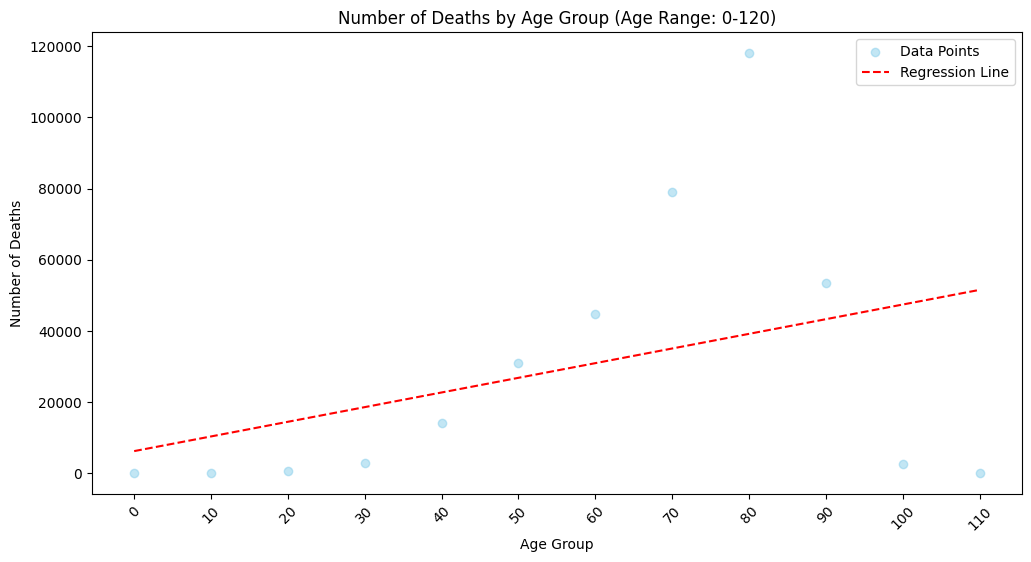

In [78]:
#Determine if there is a relationship between age and death due to heart disease using regression analysis

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(age_group_counts.index, age_group_counts)
regression_line = slope * age_group_counts.index + intercept

# Calculate R-squared value
r_squared = r_value ** 2
print(f"R-squared value: {r_squared}")

# Create a scatter plot of deaths by age group
plt.figure(figsize=(12, 6))
plt.scatter(age_group_counts.index, age_group_counts, color='skyblue', alpha=0.5, label='Data Points')
plt.plot(age_group_counts.index, regression_line, color='red', linestyle='--', label='Regression Line')
plt.title('Number of Deaths by Age Group (Age Range: 0-120)')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(age_group_counts.index, rotation=45)
plt.legend()
plt.show()

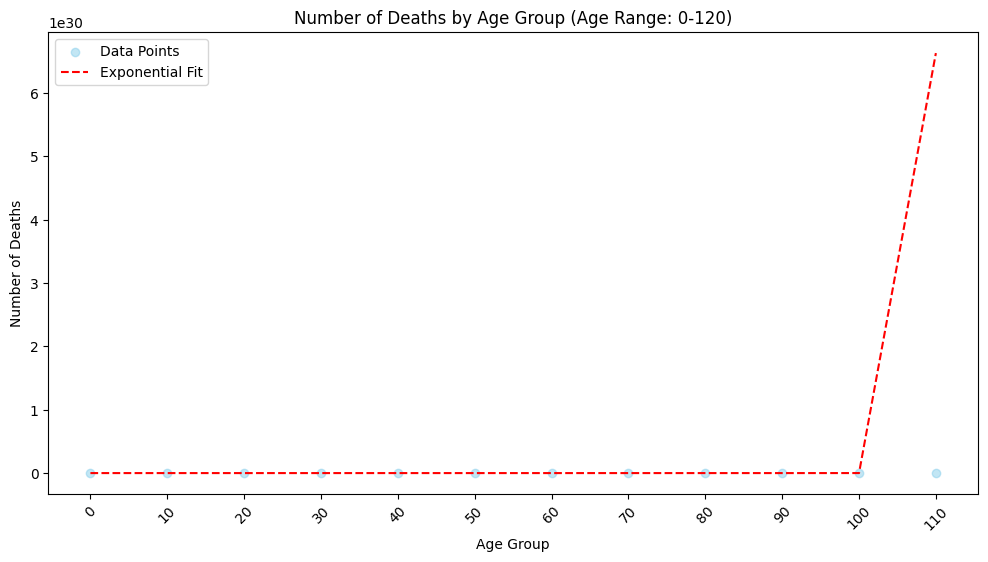

In [79]:
#Linear regression analysis dos not appear to fit for this curved data trend
#Attempt to identify a different curve fit analysis

# Define an exponential function for curve fitting
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Perform curve fitting using exponential function
popt, pcov = curve_fit(exponential_func, age_group_counts.index, age_group_counts)

# Create a scatter plot of deaths by age group
plt.figure(figsize=(12, 6))
plt.scatter(age_group_counts.index, age_group_counts, color='skyblue', alpha=0.5, label='Data Points')
plt.plot(age_group_counts.index, exponential_func(age_group_counts.index, *popt), color='red', linestyle='--', label='Exponential Fit')
plt.title('Number of Deaths by Age Group (Age Range: 0-120)')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(age_group_counts.index, rotation=45)
plt.legend()
plt.show()

In [ ]:
#Use this cell to describe findings